In [1]:
# importing necessary dependencies

import seaborn as sns
sns.set(style='ticks')
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.DataStructs import BitVectToText
import matplotlib.pyplot as plt



In [2]:
#loading out dataset form the previous ipynb file

df = pd.read_csv('cleaned_drug_data.csv')
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL330863,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,576.742,5.28050,1,8,6.892790
1,1,CHEMBL124660,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,562.715,5.03450,1,8,6.657577
2,4,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,inactive,493.615,4.59032,2,7,4.522879
3,5,CHEMBL124035,COCCOc1cc2ncnc(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC...,active,495.580,3.80490,1,8,6.346787
4,6,CHEMBL125898,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,564.687,3.88080,1,9,7.397940


In [3]:
list(df.columns)

['Unnamed: 0',
 'molecule_chembl_id',
 'canonical_smiles',
 'bioactivity',
 'MW',
 'LogP',
 'NumHDonors',
 'NumHAcceptors',
 'pIC50']

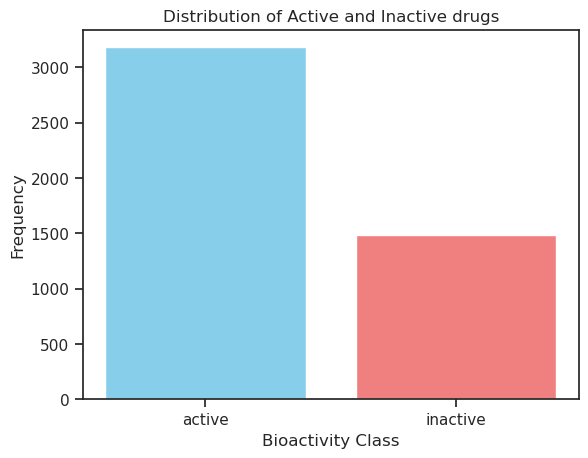

In [4]:
# Get the frequency of each bioactivity class

bioactivity_counts = df['bioactivity'].value_counts()

# Extract the classes (for x-axis) and frequencies (for y-axis)
bioactivity_classes = bioactivity_counts.index
frequencies = bioactivity_counts.values
    
plt.bar(bioactivity_classes, frequencies, color=['skyblue', 'lightcoral'])

plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.title('Distribution of Active and Inactive drugs')
plt.xticks(rotation=0) #keeps the labels horizontal

plt.show()

Text(0.5, 1.0, 'Scatter plot of LogP against Molecular Weight')

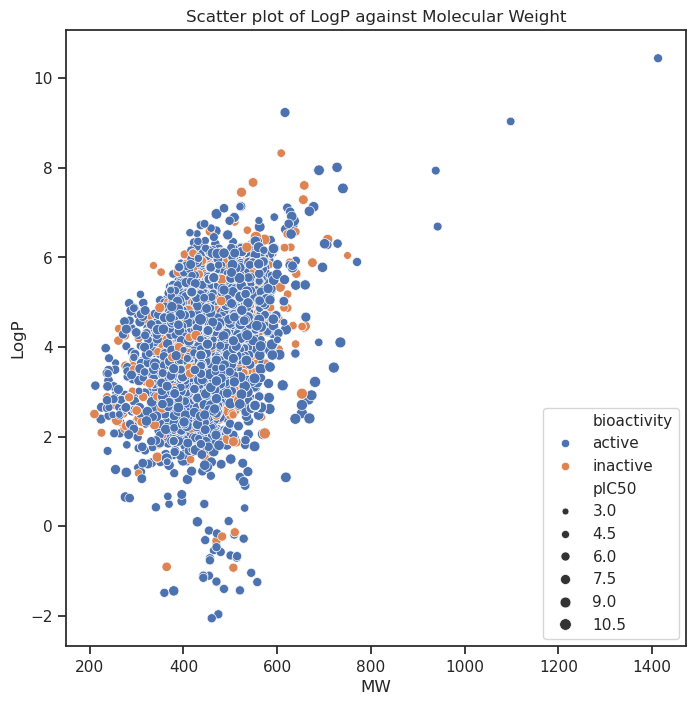

In [5]:
#scatter plot using sns

plt.figure(figsize=(8,8))

sns.scatterplot(x='MW', y= 'LogP', data=df, hue = 'bioactivity', size='pIC50')
plt.xlabel('MW')
plt.ylabel('LogP')
plt.title('Scatter plot of LogP against Molecular Weight')


Text(0.5, 1.0, 'Boxplot of bioactivity and pIC50 ')

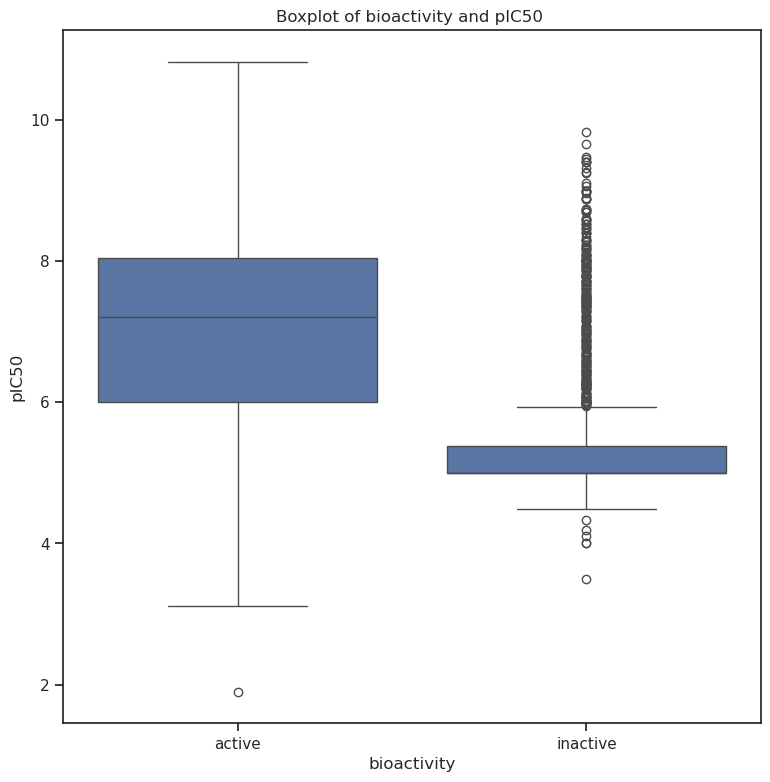

In [6]:
#creating a boxplot

plt.figure(figsize=(9,9))

sns.boxplot(x='bioactivity', y='pIC50', data=df)
plt.xlabel('bioactivity') 
plt.ylabel('pIC50')
plt.title('Boxplot of bioactivity and pIC50 ')

## Using RDKit to convert Canonical_smiles to readable bites for the computer system.

How it works (RDkit)

RDKit allows one to generate various types of molecular fingerprints directly from SMILES strings. Morgan Fingerprints (which are similar to Extended Connectivity Fingerprints, ECFP).

Convert SMILES to RDKit Mol Objects:
RDKit operates on molecular objects. So I converted my canonical_smiles strings into RDKit's Mol objects.

Generating Fingerprints:
I went with Morgan fingerprints. (rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
* mol: Your RDKit molecule object
* radius: How many bonds away from a central atom the substructure search extends. Common values are 2 or 3.
* nBits: The length of fingerprint vector (e.g., 1024, 2048 bits).
  
Convert Fingerprints to NumPy Arrays/Pandas DataFrame:
The output of GetMorganFingerprintAsBitVect is a bit vector, which can be easily converted into a NumPy array of 0s and 1s, and then into a Pandas DataFrame.

In [7]:
#This function takes smiles as an argument and converts it to Morgan finderpirnt (ECFP-like)
#it returns a np array of 0s and 1s which I will convert to pd DataFrame
# I imported all the dependecies at on line 1

def smiles_to_morgan_fingerprint(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None: 
        return None #handle a Non SMILES error
        
    generator = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=nBits)
    fingerprint = generator.GetFingerprint(mol)
   
    return np.array(fingerprint)


In [8]:
#calling the function to our data

df['mol_fingerprint'] = df['canonical_smiles'].apply(smiles_to_morgan_fingerprint)

# dropping the rows with invalid smiles
df_valid = df.dropna(subset=['mol_fingerprint']).copy()
df_valid.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50,mol_fingerprint
0,0,CHEMBL330863,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,576.742,5.28050,1,8,6.892790,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,1,CHEMBL124660,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,562.715,5.03450,1,8,6.657577,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,4,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,inactive,493.615,4.59032,2,7,4.522879,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,5,CHEMBL124035,COCCOc1cc2ncnc(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC...,active,495.580,3.80490,1,8,6.346787,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,6,CHEMBL125898,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,564.687,3.88080,1,9,7.397940,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


## Molecular Fingerprints (Morgan Fingerprints)

Molecular fingerprints are numerical representations of chemical structures, crucial for machine learning models that cannot directly process SMILES strings.
They encode the presence of specific structural features in a molecule as a vector of binary digits (bits), 
where '1' indicates the presence and '0' indicates the absence of a feature.

In this project, Morgan Fingerprints (a variant of Extended Connectivity Fingerprints, ECFP) are generated using RDKit.
These are circular fingerprints that represent features by considering atom environments up to a certain radius.

### How Morgan Fingerprints are Generated:

Atom Environments: Each atom in a molecule is assigned an initial identifier.

Iterative Expansion: In successive iterations (controlled by the radius), 
                     the algorithm collects information about the neighboring atoms and bonds.

Hashing: These extended environments are then hashed into a fixed-size bit vector. 
         If a specific hashed environment is present, the corresponding bit in the fingerprint is set to 1.

### Key Parameters Used:

radius (e.g., radius=2): This parameter defines the maximum radius of the circular environment considered around each atom.
A radius=2 means the fingerprint captures atom environments up to 2 bonds away from a central atom. 
Higher radii capture larger, more complex substructures.

nBits (e.g., nBits=2048): This parameter specifies the desired length of the resulting binary fingerprint vector.
A larger nBits reduces the chance of collisions (multiple different substructures mapping to the same bit), 
potentially leading to a more discriminative fingerprint.

### Significance in Drug Discovery ML:

Morgan fingerprints effectively capture structural similarity between molecules.
Molecules with similar activities often share common substructures, which are represented by overlapping bits in their fingerprints.
By training a machine learning model on these fingerprints, it learns to identify these key structural features indicative of desired biological activity.

In [9]:

fingerprint_df = pd.DataFrame(df_valid['mol_fingerprint'].tolist(), 
                                index=df_valid.index, #keep originalindex foe easy merging
                                columns=[f'FP_Bit_{i}' for i in range(2048)]) # Use a list comprehension for ordered columns

# preparing my data for merging
final_ml_df = df_valid.drop(columns=['canonical_smiles', 'mol_fingerprint']).copy()
final_ml_df = pd.concat([final_ml_df, fingerprint_df], axis=1) # concatenating the dfs


print(f"\nshape of final ML DataFrame: {final_ml_df.shape}")
print(final_ml_df.head())
                              


shape of final ML DataFrame: (4661, 2056)
   Unnamed: 0 molecule_chembl_id bioactivity       MW     LogP  NumHDonors  \
0           0       CHEMBL330863      active  576.742  5.28050           1   
1           1       CHEMBL124660      active  562.715  5.03450           1   
2           4          CHEMBL941    inactive  493.615  4.59032           2   
3           5       CHEMBL124035      active  495.580  3.80490           1   
4           6       CHEMBL125898      active  564.687  3.88080           1   

   NumHAcceptors     pIC50  FP_Bit_0  FP_Bit_1  ...  FP_Bit_2038  FP_Bit_2039  \
0              8  6.892790         0         1  ...            0            0   
1              8  6.657577         0         1  ...            0            0   
2              7  4.522879         0         0  ...            0            0   
3              8  6.346787         0         1  ...            0            0   
4              9  7.397940         0         1  ...            0            0   

 

## The shape (4661, 2056) makes sense:

 I have:
 * 4661 molecules (rows).
 * 2048 new fingerprint features (FP_Bit_0 to FP_Bit_2047).
 * 8 original columns (Unnamed: 0, molecule_chembl_id, bioactivity, MW, LogP,     NumHDonors, NumHAcceptors, pIC50).
 * 2048+8=2056, which matches the co

In [11]:
# To store the final DataFrame to a CSv

final_ml_df.to_csv('fingerprinted_data.csv', index=False)
print("Data successfully saved to 'fingerprinted_data.csv'")

Data successfully saved to 'fingerprinted_data.csv'
